In [1]:
using Flux
using Flux: params
using BSON: @load
using Plots
using MLDatasets
using Images

In [2]:
include("./vaemodel.jl")

openvaeloss (generic function with 1 method)

In [3]:
@load "./models/tinyv3intrain4" model

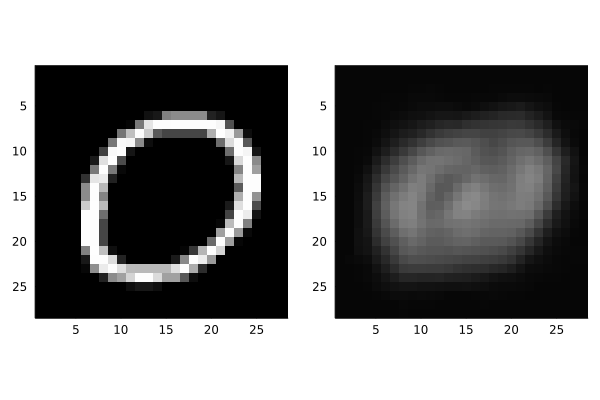

In [12]:

img = MNIST(Float32, :test).features[:, :, convert(Integer, ceil(5000.0*rand()))]
recodedimg = reshape(model(reshape(img, :)), 28, 28)
plot(
    plot(colorview(Gray, img)), plot(colorview(Gray, recodedimg))
)

In [192]:
lossfn = vaeloss(model, 1, 0.01)

(::var"#loss#76"{FullVae{Chain{Tuple{Dense{typeof(relu), Matrix{Float32}, Bool}, Dense{typeof(relu), Matrix{Float32}, Bool}, Dense{typeof(σ), Matrix{Float32}, Bool}}}}, Int64, Float64}) (generic function with 1 method)

In [47]:

lossfn = openvaeloss(model, 1, 0.01)

(::var"#loss#50"{FullVae{Chain{Tuple{Dense{typeof(relu), Matrix{Float32}, Bool}, Dense{typeof(relu), Matrix{Float32}, Bool}, Dense{typeof(σ), Matrix{Float32}, Bool}}}}, Int64, Float64}) (generic function with 1 method)

In [49]:
lossfn(reshape(img,:))

(0.6931469892000144, 6.937980651855469e-5, 0.6216958618164062)

In [56]:
act = Flux.activations(model.encoder.encoderbody,reshape(img, :))[]

128-element Vector{Float32}:
 0.08903391
 0.102538705
 0.0
 0.066066675
 0.011646464
 0.0
 0.0
 0.0
 0.3482909
 0.37549806
 ⋮
 0.15872101
 0.0
 0.0
 0.0
 0.0
 0.12823182
 0.12713487
 0.102258004
 0.018116143

In [27]:
using Statistics

In [123]:
include("./compressedsensing.jl")


singlerecoveryfourierexperiment (generic function with 1 method)

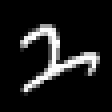

In [136]:
using MLDatasets
using Images
someimage = MNIST(Float32, :test).features[:,:,7]
Gray.(someimage)

In [140]:
(recoveredx, error) = singlerecoveryfourierexperiment(reshape(someimage, :), model.decoder, 20, 28^2, 28^2, max_iter = 500_000, tolerance=1e-6, tblogdir="./logs/optimlogs/", opt = Flux.Optimise.ADAM(0.02))

([7.08532463739277e-9, 7.085326600423244e-9, 7.08532552554339e-9, 7.085327574610217e-9, 7.085324650329886e-9, 7.085366629145676e-9, 7.085324556028344e-9, 7.085325614557791e-9, 7.085325613471237e-9, 7.085325347816329e-9  …  0.005382281727266673, 0.0005550469297734414, 5.80181247775153e-10, 4.423263557402291e-10, 9.341474564596097e-9, 7.085324310693476e-9, 7.085325509545996e-9, 7.085323337242933e-9, 7.0853255010471285e-9, 7.085338644479679e-9], 6.951267250120287)

In [141]:
error

6.951267250120287

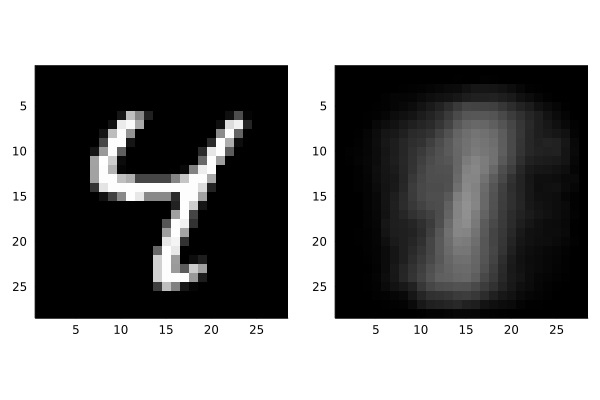

In [142]:
plot(
    plot(colorview(Gray, someimage')),
    plot(colorview(Gray, reshape(recoveredx, 28,28)'))
)

In [19]:
using LinearAlgebra

In [20]:
diagm

diagm (generic function with 8 methods)